<div style= "text-align: right">
    <p style= "text-align: right; font-weight: bold; font-size: x-large;">FIT3182 Big Data Management and Processing</p>
    <p style= "text-align: right; font-weight: bold; font-size: large;">Assignment 2</p>
    <p style= "text-align: right">Foo Kai Yan</p>
    <p style= "text-align: right">kfoo0012@student.monash.edu<br><br><i>33085625<br><br><i>22<sup>th</sup> May 2024</i></p>
<div>
<hr style="border-color: black;">

## Student Statement
The assignment was completed with the assistance of some code obtained from seminar/tutorial/lab/applied class.

### Import required Libraries

In [1]:
import os
import json
import folium
import pymongo
import datetime as dt
from time import sleep
from pprint import pprint
from kafka3 import KafkaConsumer
import matplotlib.pyplot as plt
from pymongo import MongoClient

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

### Check working directory

In [2]:
os.getcwd()

'/home/student/ASSIGNMENT2'

### Set host ip

In [3]:
# hostip obtained using `ipconfig` command in command prompt
hostip = "10.192.45.141"

### Streaming Data Visualisation

<IPython.core.display.Javascript object>


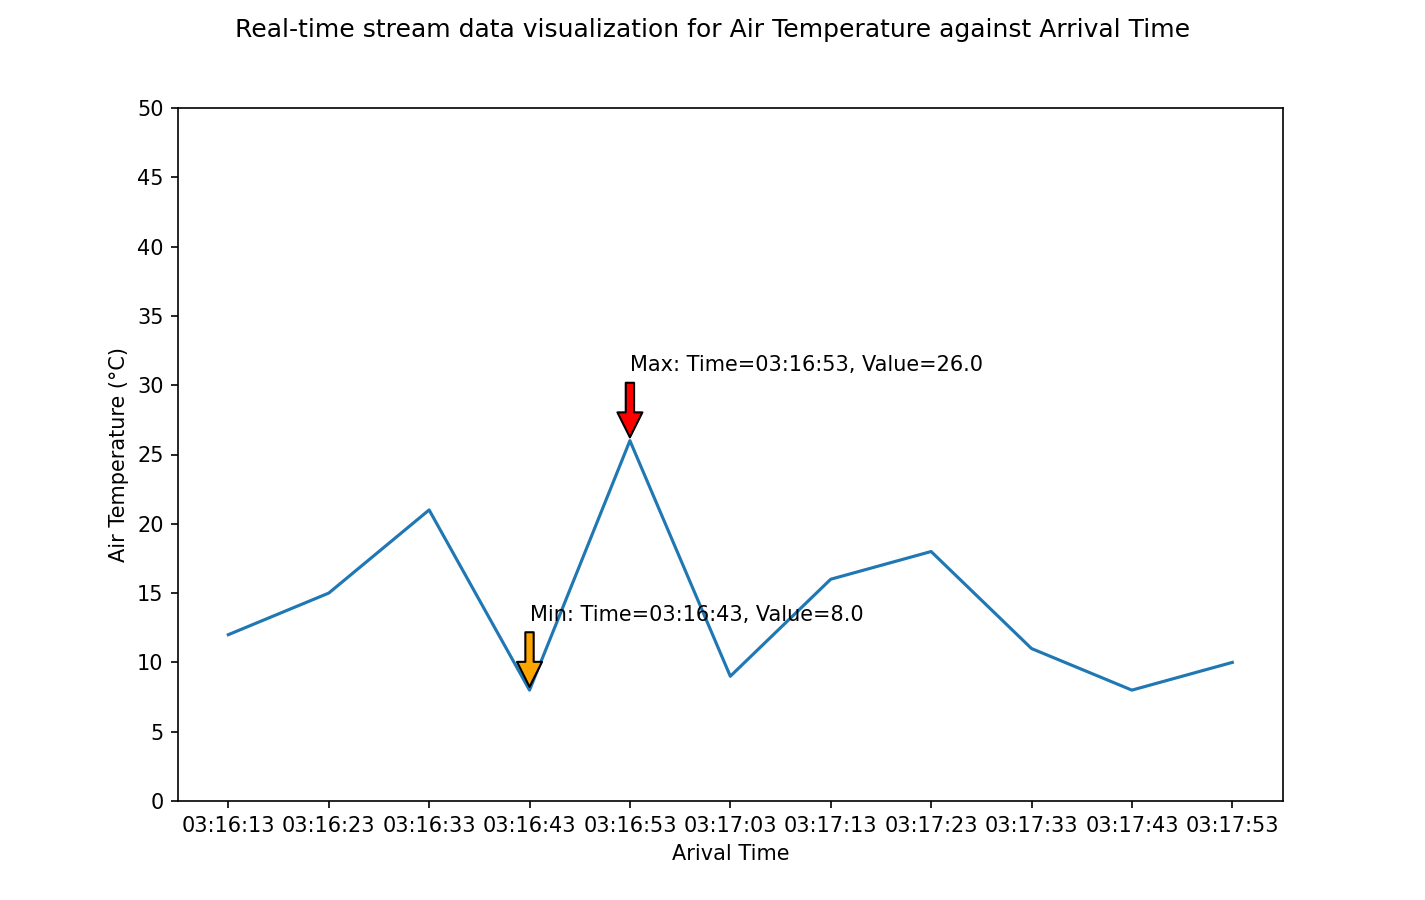

KeyboardInterrupt: 

In [4]:
topic = "Climate"

def connect_kafka_consumer():
    '''
    connect_kafka_consumer function:
    - attempts to connect to a Kafka cluster and create a consumer for a specified predefined topic
    '''
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=[f'{hostip}:9092'],
                                   api_version=(0, 10)) # Sets the Kafka API version that the client will use to communicate with the Kafka cluster
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def annotate_max(x, y, ax = None):
    '''
    annotate the maximum points on the plot
    '''
    ymax = max(y) # Finds the maximum value in the y dataset
    xpos = y.index(ymax) # Finds the index position of the maximum value in the y dataset
    xmax = x[xpos] # Retrieves the corresponding x-coordinate for the maximum y-value
    text = 'Max: Time={}, Value={}'.format(xmax, ymax)
    if not ax:
        ax=plt.gca() # Get current axes
        
    # To add annotations to a plot.
    # `xy` is to specify the location of the point
    # `xytext` specifies the location of the text
    # `arrowprops` specifies the properties of the arrow
    
    ax.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax+5), arrowprops=dict(facecolor='red', shrink=0.05),)
    
def annotate_min(x, y, ax = None):
    '''
    annotate the minimum points on the plot
    '''
    ymin = min(y) # Finds the minimum value in the y dataset
    xpos = y.index(ymin) # Finds the index position of the minimum value in the y dataset
    xmin = x[xpos] # Retrieves the corresponding x-coordinate for the minimum y-value
    text = 'Min: Time={}, Value={}'.format(xmin, ymin)
    if not ax:
        ax=plt.gca()
    ax.annotate(text, xy=(xmin, ymin), xytext=(xmin, ymin+5), arrowprops=dict(facecolor='orange', shrink=0.05),)
    
def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # Create new figure
        ax = fig.add_subplot(111) # Add the subplot axes to the given grid position
        # Sets the title of the figure:
        fig.suptitle('Real-time stream data visualization for Air Temperature against Arrival Time')
        # Set labels for the x-axis and y-axis:
        ax.set_xlabel('Time')
        ax.set_ylabel('Value')
        # Sets the limits of the y-axis to range from 0 to 110:
        ax.set_ylim(0,110) 
        # Specifies the tick marks on the y-axis at intervals of 20 units:
        ax.set_yticks([0, 20, 40, 60, 80, 100])
        fig.show() # Displaying the figure
        fig.canvas.draw() # Drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
        
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
        x, y = [], []
        count = 0
        # print('Waiting for messages')
        for message in consumer:
            byte_string = message.value
            #print("MESSAGE: ", message)
            # Decode the byte string to a string
            convert_to_json_str = byte_string.decode('utf-8')
            # Parse the string into a JSON object (dictionary)
            parse_string_data = json.loads(convert_to_json_str)
            # Access the value for producer_id
            producer_id = parse_string_data.get('producer_id')
            
            # search specific producer_id because we only process the climate data
            if producer_id == "producer1_climate": 
                data = message[6].decode("utf-8") # decode because it was encoded in bytes
                data = json.loads(data) # loading into dictionary
                x.append(dt.datetime.now().strftime("%X")) 
                y.append(data.get("air_temperature_celcius"))
                count += 1
                # we start plotting only when we have 10 data points
                if len(y) > 10:
                    ax.clear()
                    ax.plot(x, y)
                    
                    ax.set_xlabel('Arival Time')
                    ax.set_ylabel('Air Temperature (°C)')
                    
                    ax.set_ylim(0,50) 
                    ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]) # Manually set the range for Air Temperature
                    
                    annotate_max(x,y)
                    annotate_min(x,y)
                    
                    fig.canvas.draw()
                    
                    x.pop(0) # removing the item in the first position
                    y.pop(0)
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)

### Static Data Visualisation

#### Part A

[{'_id': None, 'fire_events_count': 43}, {'_id': '05', 'fire_events_count': 1}, {'_id': '11', 'fire_events_count': 8}, {'_id': '13', 'fire_events_count': 5}, {'_id': '17', 'fire_events_count': 1}, {'_id': '19', 'fire_events_count': 1}, {'_id': '23', 'fire_events_count': 1}]
[{'_id': '0', 'fire_events_count': 43}, {'_id': '05', 'fire_events_count': 1}, {'_id': '11', 'fire_events_count': 8}, {'_id': '13', 'fire_events_count': 5}, {'_id': '17', 'fire_events_count': 1}, {'_id': '19', 'fire_events_count': 1}, {'_id': '23', 'fire_events_count': 1}]


<IPython.core.display.Javascript object>


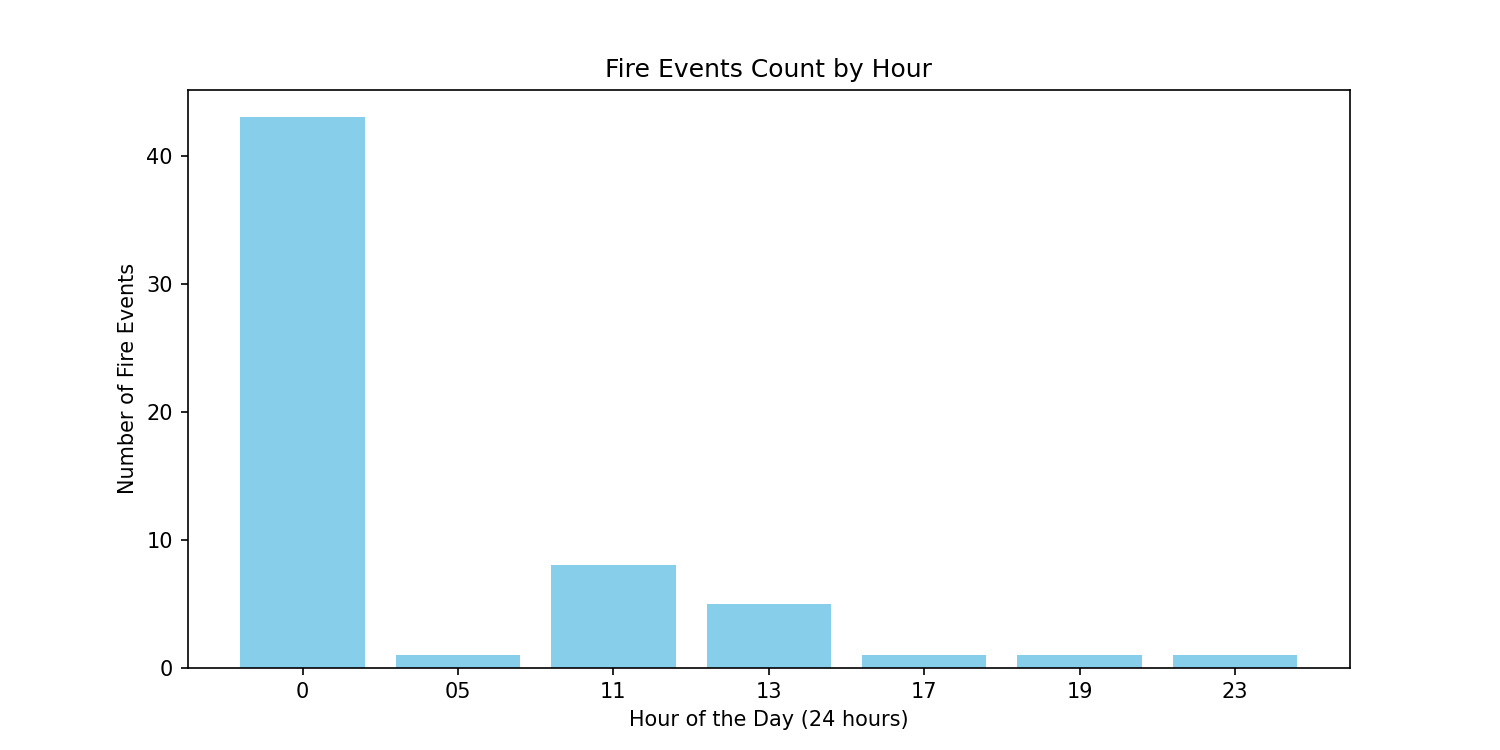

In [5]:
client = MongoClient(f'mongodb://{hostip}:27017/')
db = client.fit3182_assignment_db
climate_collection = db.climate_collection

# Aggregation pipeline
pipeline = [
    {
        '$unwind': '$fire_events'
    },
    {
        '$group': {
            '_id': '$fire_events.created_hour',
            'fire_events_count': {'$sum': 1}
        }
    },
    {
        '$sort': {'_id': 1}  # Sort by created_hour in ascending order
    }
]

# Execute the aggregation pipeline
hourly_fire_events = list(climate_collection.aggregate(pipeline))
print(hourly_fire_events)

# Replace None with '0'
for event in hourly_fire_events:
    if event['_id'] is None:
        event['_id'] = '0'
print(hourly_fire_events)

# Extract hours and fire event counts
hours = [record['_id'] for record in hourly_fire_events]
counts = [record['fire_events_count'] for record in hourly_fire_events]

if counts is not None:
    # Perform the operation that requires a string or bytes object
    counts = [record['fire_events_count'] for record in hourly_fire_events]
else:
    # Handle the case where 'value' is None
    counts = 0

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(hours, counts, color='skyblue')

# Add title and labels
plt.title('Fire Events Count by Hour')
plt.xlabel('Hour of the Day (24 hours)')
plt.ylabel('Number of Fire Events')

# Set x-axis to show labels from 0 to 24
#plt.xticks(range(25), range(25))

# Show the plot
plt.show()

#### Part B

In [6]:
# Connect to MongoDB to obtain data
client = MongoClient(f'mongodb://{hostip}:27017/')
db = client.fit3182_assignment_db
climate_collection = db.climate_collection

# Preparing the data for plotting
natural_fire_events = []
other_fire_events = []

# Looping through all the data
for row in climate_collection.find():
    # pprint(row)
    
    cause = None
    
    # Check if fire_events is not empty
    if row['fire_events']:
        # Extract values from the first fire event
        average_surface_temp = row['fire_events'][0]['average_surface_temp']
        confidence = row['fire_events'][0]['confidence']
        cause = row['fire_events'][0]['cause']

    # Extract remaining values
    air_temperature_celcius = row['air_temperature_celcius']
    relative_humidity = row['relative_humidity']
    latitude = row['latitude']
    longitude = row['longitude']
    
    # Checking fire_events cause
    if cause == 'natural':
        # Adding the latitude and longitude to the list of unoccupied spots
        natural_fire_events.append([(latitude, longitude), average_surface_temp, confidence, air_temperature_celcius, relative_humidity])
    elif cause == 'others':
        # Adding the latitude and longitude to the list of unoccupied spots
        other_fire_events.append([(latitude, longitude), average_surface_temp, confidence, air_temperature_celcius, relative_humidity])


In [7]:
# Initialize a map at Melbourne
fomap = folium.Map(location=[-37.812015244225677, 144.951471202974], zoom_start=15)

# Plot a blue marker for each natural data on fire_events
for data in natural_fire_events:
    folium.Marker(location=data[0], popup=f"average_surface_temp={data[1]:.2f}, confidence={data[2]:.2f}, air_temperature_celcius={data[3]:.2f}, relative_humidity={data[4]:.2f}", icon=folium.Icon(color='blue')).add_to(fomap)
    
# Plot a red marker for each natural data on fire_events
for data in other_fire_events:
    folium.Marker(location=data[0], popup=f"average_surface_temp={data[1]:.2f}, confidence={data[2]:.2f}, air_temperature_celcius={data[3]:.2f}, relative_humidity={data[4]:.2f}", icon=folium.Icon(color='red')).add_to(fomap)

In [8]:
fomap